For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
# Import your implementation
from linear_regression import Linear_regression # <--- This is your implementation

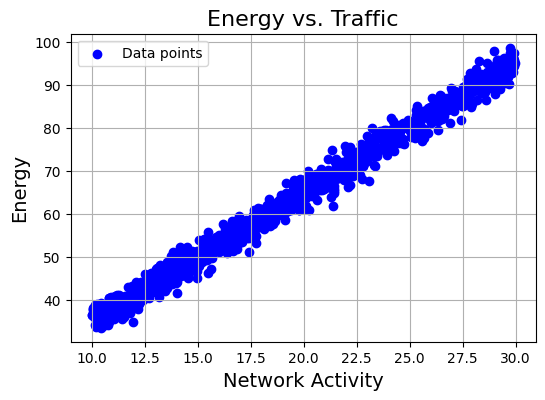

In [9]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

Predicted function: y = 3.0571 * x + 3.8442
Mean of residuals (should be close to 0): 0.07909548430950958


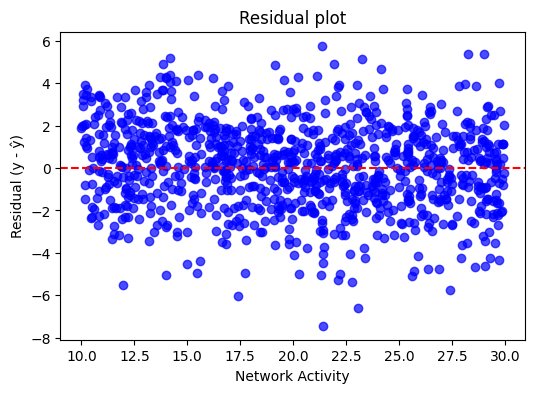

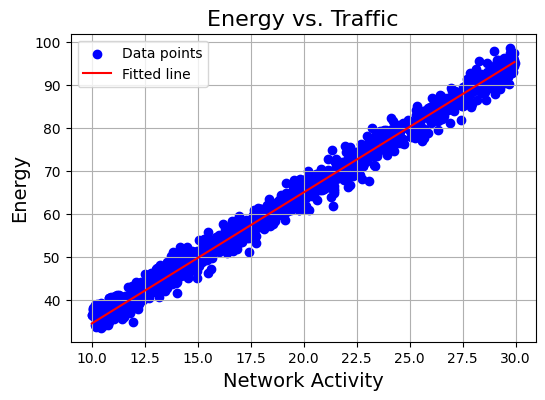

In [10]:
data = pd.read_csv('mission1.csv')
X = data[['Net_Activity']]
y = data['Energy']

lr = Linear_regression(0.0001)
lr.fit(X, y)

y_pred = lr.predict(X)
errors = y - y_pred
print("Mean of residuals (should be close to 0):", np.mean(errors))

plt.figure(1, figsize=(6, 4))
plt.scatter(X,errors, color="blue",alpha = 0.7)
plt.axhline(0,color ="red", linestyle="--", label="Zero Error Line")
plt.xlabel("Network Activity")
plt.ylabel("Residual (y - ŷ)")
plt.title("Residual plot")

plt.figure(2, figsize=(6,4))
plt.scatter(X, y, c='blue', label='Data points')
sorted_idx = np.argsort(X.values.flatten())
plt.plot(X.values.flatten()[sorted_idx], y_pred[sorted_idx], c='red', label='Fitted line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

### Discussion answers

1. The fitted curve can be seen in the plot above, and is described by the function y = 3.057x + 3.8442

2. By looking at the residual plot we can see that the mean of residuals is quite low. If it was perfect it would be 0, meaning that the predictions are random and the model is not systematically wrong. Since the mean prediction error is close to zero we can say that the estimator is unbiased. 

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

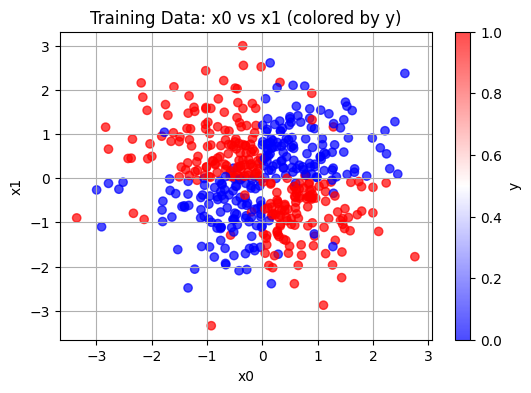

In [11]:
# initial model
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='bwr', alpha=0.7)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Training Data: x0 vs x1 (colored by y)')
plt.colorbar(label='y')
plt.grid(True)
plt.show()

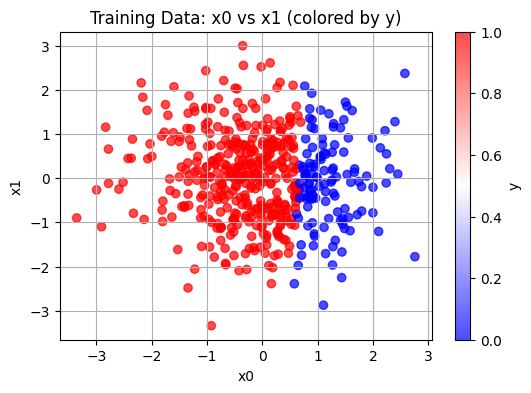

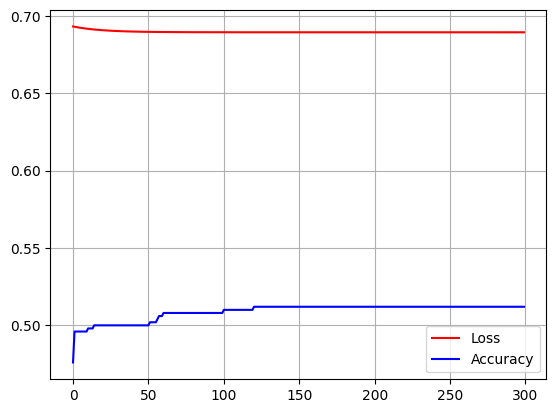

In [12]:
from logistical_regression import Logistical_regression

# Use logistical regression to fit the data
log_reg = Logistical_regression(0.1)
log_reg.fit(train[['x0','x1']],train['y'])
predictions = log_reg.predict(train[['x0', 'x1']])


plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=predictions, cmap='bwr', alpha=0.7)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Training Data: x0 vs x1 (colored by y)')
plt.colorbar(label='y')
plt.grid(True)
plt.show()

epoch_list = np.arange(0, log_reg.epochs,1)
plt.grid(True)
plt.plot(epoch_list, log_reg.losses, c="red", label="Loss")
plt.plot(epoch_list, log_reg.train_accuracies, c="blue", label="Accuracy")
plt.legend()
plt.show()

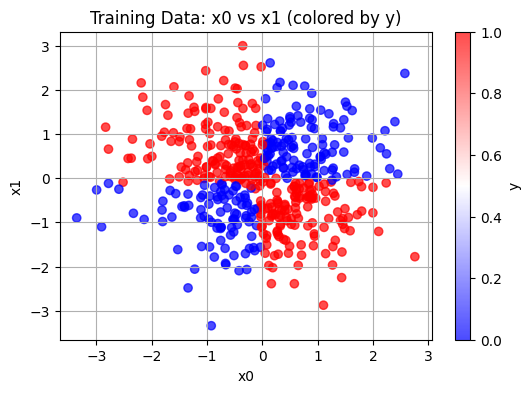

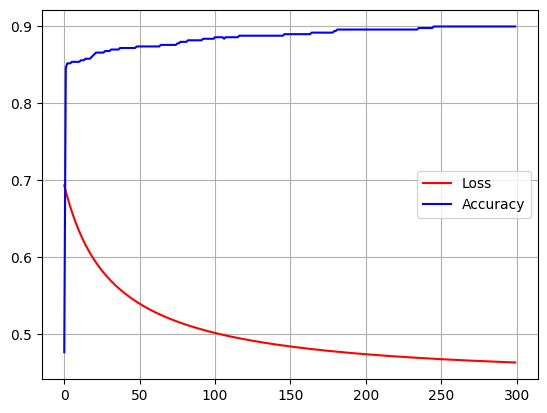

In [13]:
# improved model with interaction term

train = train.copy()
train['x0_x1'] = train['x0'] * train['x1']

log_reg = Logistical_regression(0.1)
log_reg.fit(train[['x0','x1','x0_x1']],train['y'])
predictions = log_reg.predict(train[['x0', 'x1','x0_x1']])


plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=predictions, cmap='bwr', alpha=0.7)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Training Data: x0 vs x1 (colored by y)')
plt.colorbar(label='y')
plt.grid(True)
plt.show()

epoch_list = np.arange(0, log_reg.epochs,1)
plt.grid(True)
plt.plot(epoch_list, log_reg.losses, c="red", label="Loss")
plt.plot(epoch_list, log_reg.train_accuracies, c="blue", label="Accuracy")
plt.legend()
plt.show()

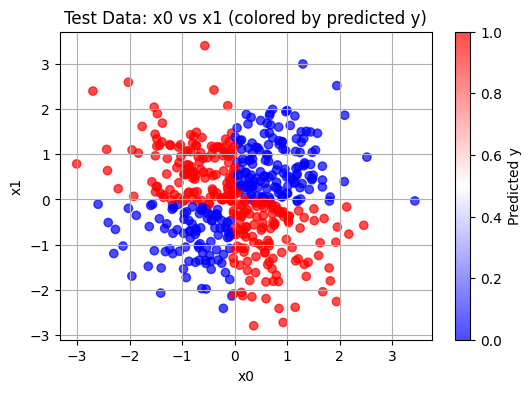

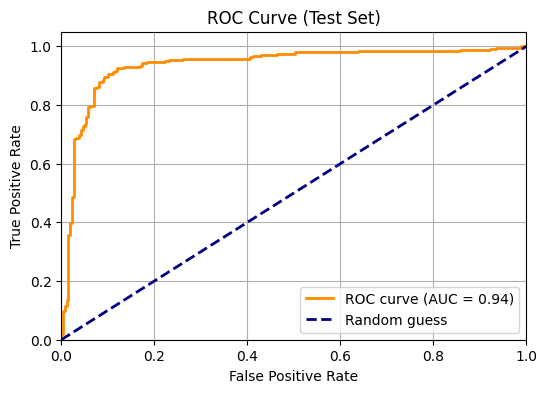

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

test = test.copy()
test['x0_x1'] = test['x0'] * test['x1']
test_predictions = log_reg.predict(test[['x0', 'x1', 'x0_x1']])


plt.figure(figsize=(6, 4))
plt.scatter(test['x0'], test['x1'], c=test_predictions, cmap='bwr', alpha=0.7)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Test Data: x0 vs x1 (colored by predicted y)')
plt.colorbar(label='Predicted y')
plt.grid(True)
plt.show()

test_predictions_proba = log_reg.predict_proba(test[['x0','x1','x0_x1']])
fpr, tpr, thresholds = roc_curve(test['y'], test_predictions_proba)
roc_auc = roc_auc_score(test['y'], test_predictions_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Accuracy: 0.922
ROC AUC: 0.9221150611192105


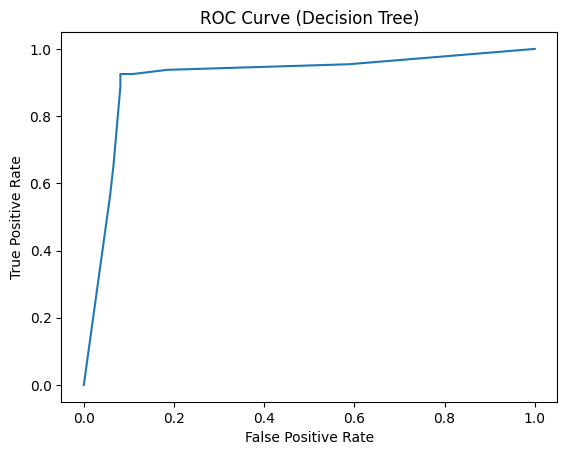

In [16]:
# Trying to solve with sklearn decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(train[['x0', 'x1', 'x0_x1']], train['y'])

test_preds = clf.predict(test[['x0', 'x1', 'x0_x1']])


print("Accuracy:", accuracy_score(test['y'], test_preds))
print("ROC AUC:", roc_auc_score(test['y'], test_preds))


test_proba = clf.predict_proba(test[['x0', 'x1', 'x0_x1']])[:, 1]
fpr, tpr, _ = roc_curve(test['y'], test_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.show()

#### Discussion answers
a. The poor initial results can be explained by the fact that the regression model can only learn a linear decision boundary. Since this data is not linearly separable, the model is unfit for the data, leading to poor performance. When we created a new feature by multiplying x0 and x1, the model could find the pattern and make better predictions.

b. A models inductive bias is the “built-in assumptions” a model has about how data works. Logistic regression expects things to be separated by a straight line. These biases decide what kinds of patterns the model can find.

c. The problem can be solved with a decision tree as seen above, but resulted in a very small decrease in accuracy than the previous method. The decision tree can create non-linear decision boundaries by recursively splitting the feature space based on feature values.

d. ROC curve plotted above.

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best ROC AUC (CV): 0.7025419699241372
Test ROC AUC: 0.726


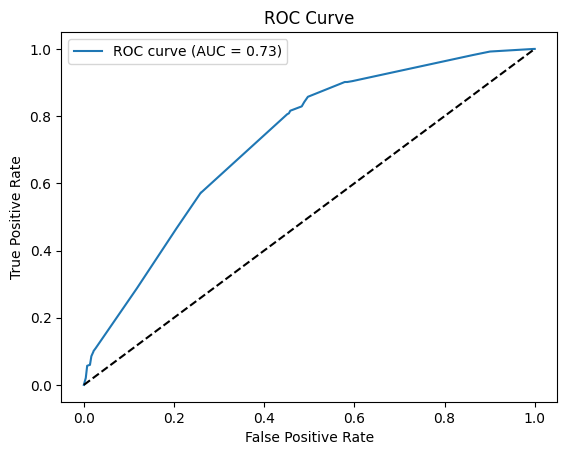

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Load data
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')


# Use all data_stream columns except data_stream_3, plus the decrypted feature
feature_cols = [col for col in train.columns if col.startswith('data_stream_') and col != 'data_stream_3']
train['ds3_even'] = train['data_stream_3'].apply(lambda x: int(int(abs(x) * 1000) % 10 % 2 == 0))
test['ds3_even'] = test['data_stream_3'].apply(lambda x: int(int(abs(x) * 1000) % 10 % 2 == 0))
feature_cols.append('ds3_even')

# Define features and target
X_train = train[feature_cols]
X_test = test[feature_cols]
y_train = train['target']
y_test = test['target']

# Hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=5)
grid.fit(X_train, y_train)

# DEBUGGING: Print all mean test scores for each parameter combination
""" for i, params in enumerate(grid.cv_results_['params']):
    mean_auc = grid.cv_results_['mean_test_score'][i]
    print(f"Params: {params} -> Mean ROC AUC: {mean_auc:.3f}") """

# DEBUGGING: Best parameters and score
print("Best parameters:", grid.best_params_)
print("Best ROC AUC (CV):", grid.best_score_)

# Use best estimator on test set
best_clf = grid.best_estimator_
y_proba = best_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Test ROC AUC: {roc_auc:.3f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} -> Mean ROC AUC: 0.708
Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} -> Mean ROC AUC: 0.709
Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} -> Mean ROC AUC: 0.707
Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} -> Mean ROC AUC: 0.709
Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50} -> Mean ROC AUC: 0.708
Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100} -> Mean ROC AUC: 0.710
Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50} -> Mean ROC AUC: 0.707
Params: {'criterion': 'gini', 'max_depth': 5,

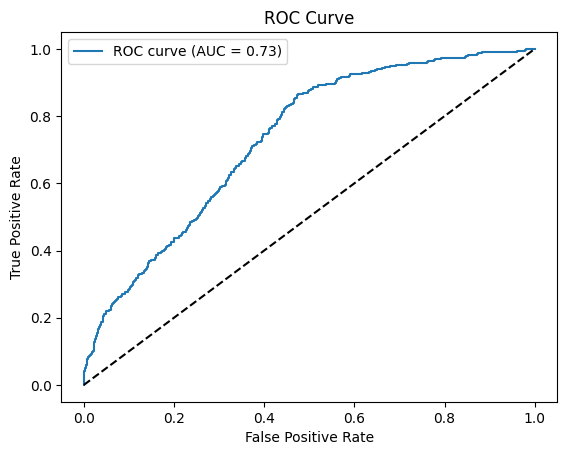

In [22]:
# using random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd
# Load data
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')
# Use all data_stream columns except data_stream_3, plus the decrypted feature
feature_cols = [col for col in train.columns if col.startswith('data_stream_') and
                col != 'data_stream_3']
train['ds3_even'] = train['data_stream_3'].apply(lambda x: int(int(abs(x) * 1000) % 10 % 2 == 0))
test['ds3_even'] = test['data_stream_3'].apply(lambda x: int(int(abs(x) * 1000) % 10 % 2 == 0))
feature_cols.append ('ds3_even')

# Define features and target
X_train = train[feature_cols]
X_test = test[feature_cols]
y_train = train['target']
y_test = test['target']

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}
clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=5)
grid.fit(X_train, y_train)

# DEBUGGING: Print all mean test scores for each parameter combination
for i, params in enumerate(grid.cv_results_['params']):
    mean_auc = grid.cv_results_['mean_test_score'][i]
    print(f"Params: {params} -> Mean ROC AUC: {mean_auc:.3f}")

# DEBUGGING: Best parameters and score
print("Best parameters:", grid.best_params_)
print("Best ROC AUC (CV):", grid.best_score_)

# Use best estimator on test set
best_clf = grid.best_estimator_
y_proba = best_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Test ROC AUC: {roc_auc:.3f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Discussion answers

a. My threshold breaking strategy consisted of first trying to find how to decrypt the data and seeing what made a difference to the ROC curve, ending up with rounding the third decimal of the encrypted datastream. Then Trying a grid of parameters to find the optimal parameters.

b. When class imbalance is present or when we want to evaluate how well the model separates classes accross thresholds, an ROC curve is a better metric than accuracy. The ROC curve for both methods is plotted above. We can see that the area under the curve (AUC) is high, which means our model is good at ranking positive cases higher than negative ones.

c. We can see that the ROC Curve is almost identical for the two methods, however the Random forest approach uses alot more resources so for practical purposes, the simpler decision tree might be preferred unless the dataset or problem gets more complicated.

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [ ]:
train = pd.read_csv('final_mission_train.csv')

# The columns are correct, but the data is shifted. 
# have to move each column's data one step to the right, and move the last column's data to 'nexus_rating'.

test = pd.read_csv('final_mission_test.csv')
cols = test.columns.tolist()
nexus_index = cols.index('nexus_rating')

last_col_data = test.iloc[:, -1].copy()

for i in range(len(cols)-1, nexus_index, -1):
    test.iloc[:, i] = test.iloc[:, i-1]

test.iloc[:, nexus_index] = last_col_data

# DEBUGGING: Print first few rows to verify that column-data is shifted correctly
""" print(train.head(3))
print(test.head(3)) """

# Approach 1: Impute missing values with mean for numeric columns and mode for categorical columns
""" for col in test.columns:
    if test[col].nunique() <= 10:
        test[col] = test[col].fillna(test[col].mode()[0])
    else:
        test[col] = test[col].fillna(test[col].mean())


for col in train.columns:
    if train[col].nunique() <= 10:
        train[col] = train[col].fillna(train[col].mode()[0])
    else:
        train[col] = train[col].fillna(train[col].mean()) """

# Approach 2: drop rows with missing values
train = train.dropna()
test = test.dropna()


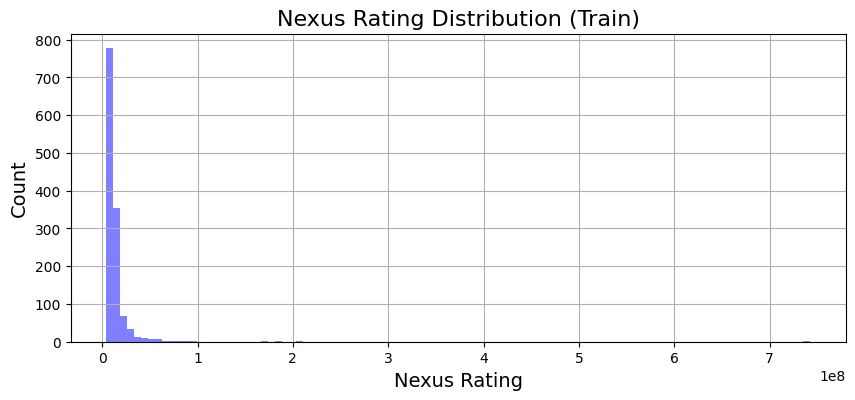

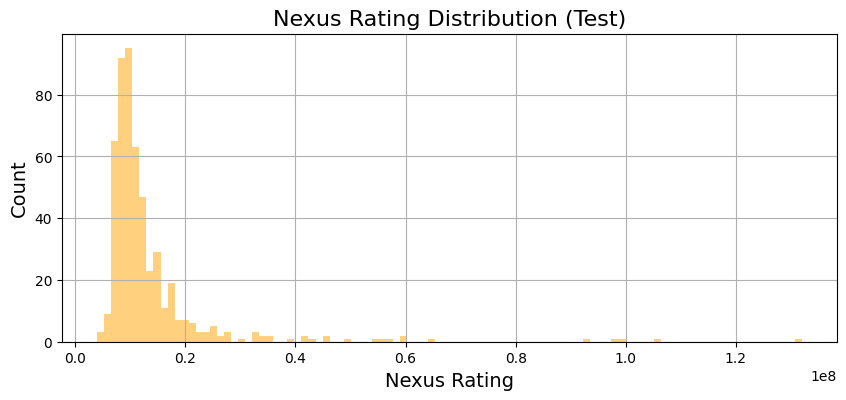

In [104]:
#plot the nexus rating distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# plot nexus rating distribution for test to check if similar
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
test['nexus_rating'].hist(bins=100, ax=ax, color='orange', alpha=0.5, label='Test Target Distribution')
ax.set_title('Nexus Rating Distribution (Test)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

In [ ]:
# Using Random Forest Regressor to predict the nexus rating
from sklearn.ensemble import RandomForestRegressor

# Extract features and target
features = [col for col in train.columns if col != 'nexus_rating']
X_train = train[features]
y_train = train['nexus_rating']
X_test = test[features]
y_test = test['nexus_rating']

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
y_pred_rf = np.maximum(y_pred_rf, 0.001)  # Avoid zeros for log calculation



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=42
)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_gb = np.maximum(y_pred_gb, 0.0001)  # Avoid zeros for RMSLE calculation

In [107]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [110]:
# Calculate Random forest
random_forest_rmsle_score = rmsle(y_test, y_pred_rf)
print(f"Random Forest RMSLE: {random_forest_rmsle_score:.4f}")

# Calculate RMSLE for Gradient Boosting
gb_rmsle_score = rmsle(y_test, y_pred_gb)
print(f"Gradient Boosting RMSLE: {gb_rmsle_score:.4f}")

# Create an ensemble (average of Random Forest and Gradient Boosting predictions)
y_pred_ensemble = (y_pred_rf + y_pred_gb) / 2
ensemble_rmsle_score = rmsle(y_test, y_pred_ensemble)
print(f"Ensemble RMSLE: {ensemble_rmsle_score:.4f}")

# Try weighted ensemble (may improve results)
weights = [0.6, 0.4]  # Give more weight to better performing model
y_pred_weighted = weights[0] * y_pred_rf + weights[1] * y_pred_gb
weighted_rmsle_score = rmsle(y_test, y_pred_weighted)
print(f"Weighted Ensemble RMSLE: {weighted_rmsle_score:.4f}")

print('Required RMSLE: ', 0.294)

Random Forest RMSLE: 0.2605
Gradient Boosting RMSLE: 0.2679
Ensemble RMSLE: 0.2615
Weighted Ensemble RMSLE: 0.2608
Required RMSLE:  0.294


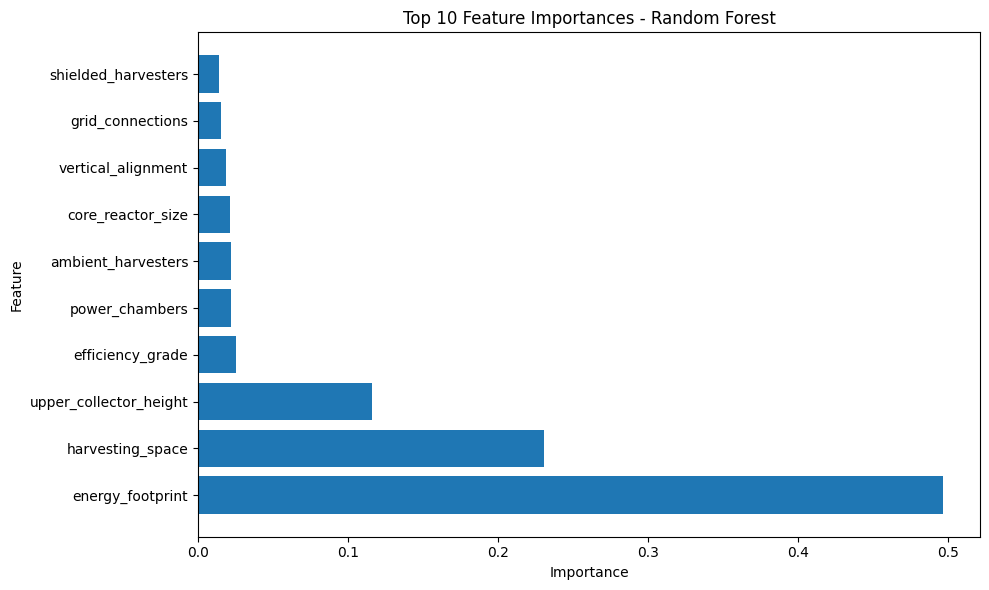

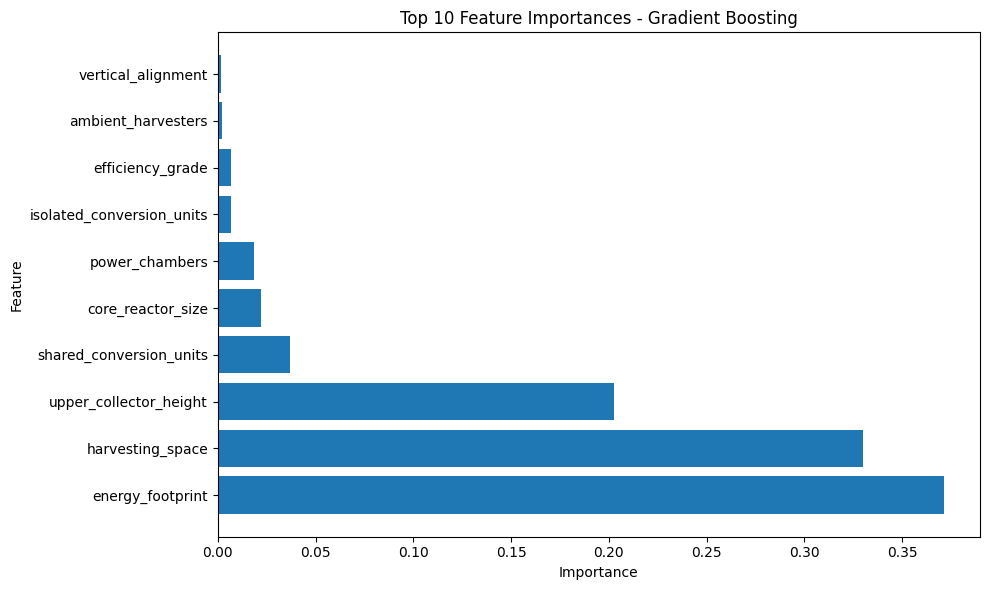

In [109]:
# Plot feature importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
top_n = 10  
plt.barh(feature_importance['Feature'][:top_n], feature_importance['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

# Plot feature importance for Gradient Boosting
gb_feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
top_n = 10 
plt.barh(gb_feature_importance['Feature'][:top_n], gb_feature_importance['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.tight_layout()
plt.show()

# Store the predictions in the test dataframe
test['pred_rf'] = y_pred_rf
test['pred_gb'] = y_pred_gb
test['pred_ensemble'] = y_pred_ensemble
test['pred_weighted'] = y_pred_weighted

### Results
#### without imputing or dropping missing values:
- Random Forest RMSLE: 0.3180
- Gradient Boosting RMSLE: N/A implementation does not work with 0 or NaN values

#### Imputing missing values:
- Random Forest RMSLE: 0.3964
- Gradient Boosting RMSLE: 0.5185
- Ensemble RMSLE: 0.4471
- Weighted Ensemble RMSLE: 0.4342

#### Dropping all rows with missing values in one or more columns
- Random Forest RMSLE: 0.2605
- Gradient Boosting RMSLE: 0.2679
- Ensemble RMSLE: 0.2615
- Weighted Ensemble RMSLE: 0.2608

### Discussion answers:

   a. Explain your threshold-breaking strategy

    First i compared the test and training data and saw that the test data had been shifted, which i then shifted it back.
    Then i tried different ways of handling the missing data, i tried without doing any imputing or removing which was not good enough to break the threshold, then i tried imputing the missing data which lead to worse performance, lastly i tried dropping all rows with missing data in one or more column, which was successfull. I also selected two different tree-based models to test out what worked best.


   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

    We use RMSLE because it penalizes relative errors and not absolute ones, in this task the percentage errors matter more because diffrent values are of completely different proportions. I talso reduces the impact of very large outliers compared to regular RMSE. The loss function is mean squared logarithmic error.
    

   c. Plot and interpret feature importances

    Both models identified the same top 3 features as most important, with the random forest distributing importance more evenly than gradient boosting. Plots seen above.

   d. Describe your ensembling techniques

    I tried stacking with both a simple averaging and also a weighted one since random forest performed a bit better. Both approaches scored better than the required RMSLE. 

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

    I could for example implement K-fold-cross validation, monitor the models performance under training to make sure the model doesn't udner or over -fit, lastly i could use models with different inductive bias and ensamble them.



